# Greedy Contraction Order finder

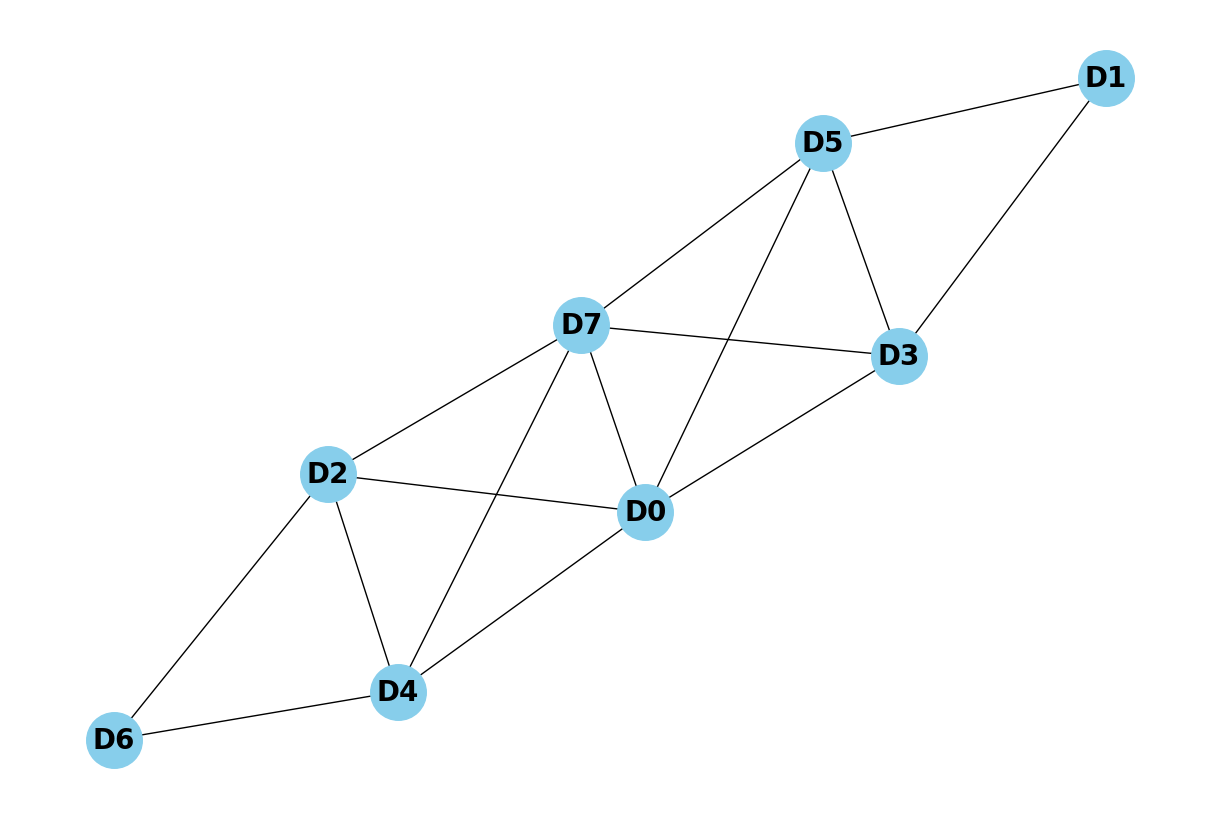

In [1]:
import stim
from hamld.contraction_strategy.dem_to_hypergraph import DetectorErrorModelHypergraph
from hamld.contraction_strategy.hypergraph_to_connectivity import ConnectivityGraph

circuit_noisy = stim.Circuit.from_file("../data/external/google23/surface_code_bZ_d3_r01_center_3_5/circuit_noisy.stim")
detector_error_model = circuit_noisy.detector_error_model()

hypergraph = DetectorErrorModelHypergraph(detector_error_model=detector_error_model)

connectivity_graph = ConnectivityGraph()
connectivity_graph.hypergraph_to_connectivity_graph(hypergraph)
connectivity_graph.draw()

In [2]:
from hamld.contraction_strategy.mld_order_finder import GreedyMLDOrderFinder, ParallelGreedyMLDOrderFinder

order_finder = GreedyMLDOrderFinder(connectivity_graph)
order = order_finder.find_order()
print(f"order: {order}")
print(f"max_dim:{order_finder.max_prob_dist_dimension}")
print(f"max_dim count:{order_finder.max_prob_dist_dimension_count}")
print(f"max_dim nodes:{order_finder.max_contracted_nodes}")

order: ['D1', 'D3', 'D5', 'D0', 'D7', 'D2', 'D4', 'D6']
max_dim:3
max_dim count:2
max_dim nodes:['D3', 'D0']


In [3]:
parallel_order_finder = ParallelGreedyMLDOrderFinder(connectivity_graph)
order = parallel_order_finder.find_order()
print(f"order: {order}")
print(f"max_dim:{order_finder.max_prob_dist_dimension}")
print(f"max_dim count:{order_finder.max_prob_dist_dimension_count}")
print(f"max_dim nodes:{order_finder.max_contracted_nodes}")

order: ['D1', 'D3', 'D5', 'D0', 'D7', 'D4', 'D6', 'D2']
max_dim:3
max_dim count:2
max_dim nodes:['D3', 'D0']


This two method order_finder can find a good order.

# 固定slice的生成

我们简单通过下面的代码替换原来的`detector = min(prob_dist_changes, key=prob_dist_changes.get)`实现order fix。

```
sorted_prob_dist_changes = sorted(prob_dist_changes.items(), key=lambda item: (item[1], item[0]))
detector = sorted_prob_dist_changes[0][0]
```